# Analyze the wave file

In [2]:
import wave

# Audio signal parameters
# - number of channels
# - sample width
# - framerate/sample rate
# - number of frames
# - values of a frame
 
obj = wave.open("5.wav","rb")

print("number of channels: ", obj.getnchannels())
print("sample width: ", obj.getsampwidth())
print("frame rate: ", obj.getframerate())
print("number of frames: ", obj.getnframes())
print("parameters", obj.getparams())

number of channels:  1
sample width:  2
frame rate:  48000
number of frames:  84096
parameters _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=84096, comptype='NONE', compname='not compressed')


In [3]:
#time of audio
t_audio = obj.getnframes() / obj.getframerate()
print(t_audio)

1.752


In [4]:
frames = obj.readframes(-1)
print(type(frames),type(frames[0]))
print(len(frames) / 2) #number of frames, /2 because two bytes per sample
obj.close()

<class 'bytes'> <class 'int'>
84096.0


In [5]:
#save the file
obj_new = wave.open('frank_new.wav','wb')

obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(48000.0)

obj_new.writeframes(frames)
obj_new.close()

#which is the same as the original file! As expected


# Plot waveform by matplotlib

In [6]:
import matplotlib.pyplot as plt
import numpy as np

obj = wave.open("1.wav","rb")

sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

print("frame rate: ", sample_freq)
print("number of frames: ", n_samples)

obj.close()

t_audio = n_samples / sample_freq
print('time of audio: ',t_audio)

frame rate:  48000
number of frames:  2384640
time of audio:  49.68


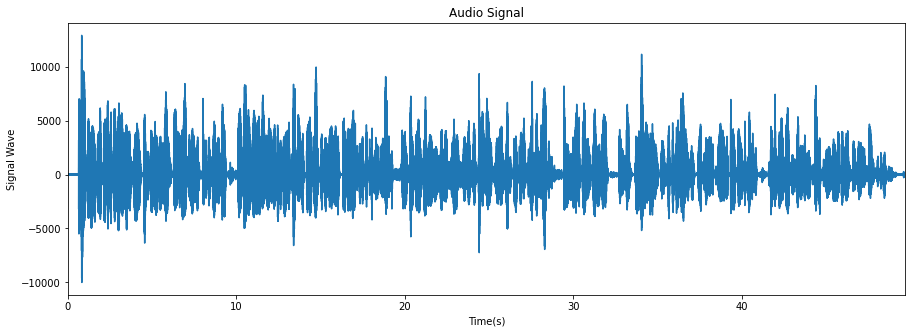

In [7]:
signal_array = np.frombuffer(signal_wave, dtype = np.int16)

times = np.linspace(0, t_audio, num=n_samples)

plt.figure(figsize=(15,5))
plt.plot(times, signal_array)
plt.title('Audio Signal')
plt.ylabel('Signal Wave')
plt.xlabel('Time(s)')
plt.xlim(0, t_audio)
plt.show()

# Get Data from microphone with PyAudio

In [8]:
import pyaudio
import wave

In [9]:
FRAMES_PER_BUFFER = 3200    #frames_per_buffer – Specifies the number of frames per buffer.
FORMAT = pyaudio.paInt16    #format – Sampling size and format. See PortAudio Sample Format.
CHANNELS = 1    #channels – Number of channels
RATE =  16000   #rate – Sampling frame rate

# To use PyAudio, first instantiate PyAudio
p = pyaudio.PyAudio()


stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,   #input – Specifies whether this is an input stream. Defaults to False.
    frames_per_buffer = FRAMES_PER_BUFFER
)


print('start recording')

seconds = 5
frames = []
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

obj = wave.open('output.wav','wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b"".join(frames)) #write all elements in frame into binary string
obj.close()


start recording


In [12]:
from pydub import AudioSegment

audio = AudioSegment.from_wav('output.wav')

#increase the volume by 6dB
audio = audio + 6

#repeat the audio
audio = audio * 2

audio = audio.fade_in(2000) #milliseconds

audio.export('mashup.mp3', format = 'mp3')

audio2 = AudioSegment.from_mp3('mashup.mp3')
print('done')

done
